In [5]:
import torch

In [16]:
print(torch.__version__)

1.7.1


In [2]:
!pip install fastai --upgrade -q
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 194kB 17.4MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 246kB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
     |████████████████████████████████| 727kB 16.0MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 1.2MB 25.7MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 


In [3]:
fastbook.setup_book()

Mounted at /content/gdrive


In [18]:
from fastbook import *
from fastai.vision.all import *

In [19]:
directory = 'Images'
folder = 'zone30'
file = 'GT-00001.csv'

#folder = 'zone50'
#file = 'GT-00002.csv'

#folder = 'zone100'
#file = 'GT-00007.csv'

#folder = 'Fahrbahnbeschränkung'
#file = 'GT-00024.csv'

#folder = 'Fahrverbot'
#file = 'GT-00024.csv'

In [20]:
path = Path('gdrive/MyDrive/Images')
dest = path/directory
dest.mkdir(parents=True, exist_ok=True)

In [21]:
path.ls()

(#13) [Path('gdrive/MyDrive/Images/GT-00001.csv'),Path('gdrive/MyDrive/Images/GT-00002.csv'),Path('gdrive/MyDrive/Images/GT-00007.csv'),Path('gdrive/MyDrive/Images/GT-00015.csv'),Path('gdrive/MyDrive/Images/GT-00024.csv'),Path('gdrive/MyDrive/Images/zone30'),Path('gdrive/MyDrive/Images/zone50'),Path('gdrive/MyDrive/Images/zone100'),Path('gdrive/MyDrive/Images/Images'),Path('gdrive/MyDrive/Images/models')...]

In [22]:
download_images(path/folder, dest, max_pics=600)

IsADirectoryError: ignored

In [23]:
Classes = ['zone30','zone50','zone100','Fahrbahnbeschränkung','Fahrverbot']

In [24]:
for c in Classes:
    print(c)
   
    verify_images(path/c)

zone30
zip argument #1 must support iteration
zone50
zip argument #1 must support iteration
zone100
zip argument #1 must support iteration
Fahrbahnbeschränkung
zip argument #1 must support iteration
Fahrverbot
zip argument #1 must support iteration


In [25]:
np.random.seed(42)
data = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), batch_tfms=aug_transforms(min_scale=0.85))


In [26]:
data.c, data.vocab

(5, ['Fahrbahnbeschränkung', 'Fahrverbot', 'zone100', 'zone30', 'zone50'])

AttributeError: ignored

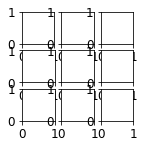

In [27]:
data.show_batch(rows=2, figsize=(2,2))

In [28]:
data.summary(path)

AttributeError: ignored

In [29]:
data.vocab, data.c, len(data.train_ds), len(data.valid_ds)

(['Fahrbahnbeschränkung', 'Fahrverbot', 'zone100', 'zone30', 'zone50'],
 5,
 5448,
 1362)

In [30]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [76]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.186897,0.413396,0.127753,02:13
1,0.458710,0.210317,0.062408,00:36
2,0.235297,0.148991,0.047724,00:36
3,0.183142,0.123517,0.043319,00:36


In [77]:
learn.save('stage-1')

Path('gdrive/MyDrive/Images/models/stage-1.pth')

In [78]:
learn.unfreeze()

SuggestedLRs(lr_min=4.78630090583465e-07, lr_steep=6.309573450380412e-07)

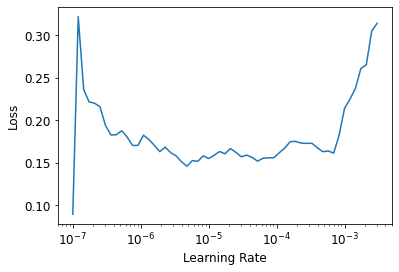

In [79]:
learn.lr_find()

In [15]:
learn.recorder.plot()

NameError: ignored

In [81]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.196082,0.636032,0.165932,00:49
1,0.072839,0.002980,0.001468,00:47
2,0.019817,0.002318,0.000734,00:48


In [61]:
learn.save('stage-2')

Path('gdrive/MyDrive/Images/models/stage-2.pth')

In [62]:
learn.load('stage-2');

In [63]:
learn.fit_one_cycle(10)

learn.save('stage-2')

learn.load('stage-2');

epoch,train_loss,valid_loss,error_rate,time
0,0.009197,0.000998,0.000000,00:41
1,0.055947,0.387054,0.082064,00:41
2,0.071433,0.021567,0.008460,00:41
3,0.031452,0.015116,0.005922,00:42
4,0.021089,0.016712,0.004230,00:41
5,0.009513,0.139229,0.023689,00:41
6,0.012082,0.004620,0.002538,00:41
7,0.006670,0.000562,0.000000,00:41
8,0.003243,0.000423,0.000000,00:41
9,0.001990,0.000207,0.000000,00:41


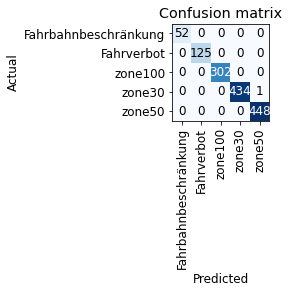

In [82]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

learn.export()

In [6]:
path2 = Path('gdrive/MyDrive/Fahrverbot.png')

In [14]:
img = Image.open(path2)
img

learn = load_learner(path)

pred_class,pred_idx,outputs = learn.predict(img)
learn.data.classes[to_data(pred_class)]

IsADirectoryError: ignored